# 指数分布

## 基本概念

- **指数分布**是描述泊松过程中**事件间隔时间**的连续概率分布，核心特征是**无记忆性**。
- **典型场景**：
    - 设备寿命建模（如灯泡寿命）
    - 客户到达商场的间隔时间
    - 放射性原子衰变间隔
- **参数**：速率参数 λ>0（单位时间内事件发生次数），或尺度参数 β=1/λ。

## 概率密度函数

指数分布的概率密度函数如下：
$$f(x; \lambda) =  \begin{cases} \lambda e^{-\lambda x}, & x \ge 0 \\ 0, & x < 0 \end{cases}$$
其中：
- $\lambda > 0$：速率参数（单位时间内事件发生的平均次数） 
- $x$：表示时间或距离等连续变量

## 均值与方差

- **均值**：$\mu = \frac{1}{\lambda} $ 
- **方差**：$\sigma^2 = \frac{1}{\lambda^2} $

## 性质

- **无记忆性**：已等待时间$s$不影响剩余等待时间的分布
$$P(X>s+t∣X>s)=P(X>t)$$
    - 也即当前已等待时间不会影响未来
- **泊松过程关联**：若事件在单位时间内发生次数服从$Poisson(λ)$，则间隔时间服从$Exp(λ)$
- **非对称性**：右偏，最大值在$x=0$处

## 图形

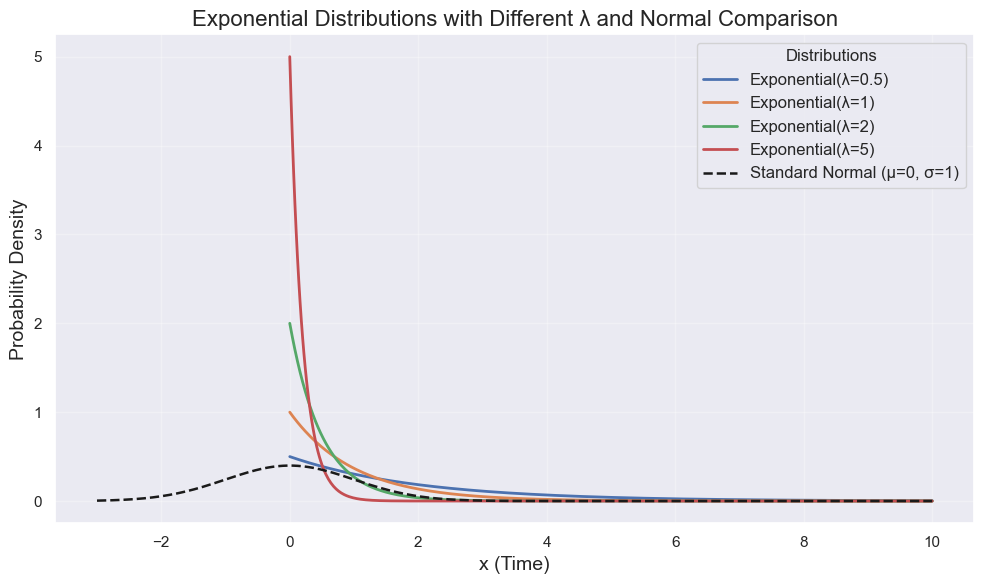

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm
import seaborn as sns
sns.set(style="darkgrid")

# 设置不同的 λ 值（速率参数）
lambdas = [0.5, 1, 2, 5]
x = np.linspace(0, 10, 500)

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制不同 λ 的指数分布
for lam in lambdas:
    pdf = expon.pdf(x, scale=1 / lam)
    plt.plot(x, pdf, label=f'Exponential(λ={lam})', linewidth=2)

# 添加标准正态分布（用于形状对比）
x_norm = np.linspace(-3, 10, 500)
y_norm = norm.pdf(x_norm, loc=0, scale=1)
plt.plot(x_norm, y_norm, 'k--', linewidth=1.8, label='Standard Normal (μ=0, σ=1)')

# 图形修饰
plt.title('Exponential Distributions with Different λ and Normal Comparison', fontsize=16)
plt.xlabel('x (Time)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(title='Distributions', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 与其他分布的关系

## 与泊松分布

- **泊松分布**：描述单位时间内事件发生的次数
- **指数分布**：描述两次事件之间的时间间隔
- **数学联系**：
    - 如果事件以平均速率$\lambda$发生（泊松过程），那么：
    - 单位时间内的事件数服从 泊松分布：
$$P(N(t) = k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!}$$
两个事件间的时间间隔$T$服从 指数分布：
$$P(T \le x) = 1 - e^{-\lambda x}$$

## 与正态分布

**中心极限定理（CLT）**：

当将多个独立指数分布变量相加：
$$Z = \sum_{i=1}^{n} X_i$$
根据中心极限定理，当$n$足够大时，$Z$的分布趋近于正态分布：
$$Z \approx \mathcal{N}(n/\lambda, n/\lambda^2)$$
